In [1]:
#필요한 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# seaborn과 matplotlib는 시각화하기 위해서

In [2]:
df = pd.read_csv("./Data/diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 학습, 예측 데이터셋 나누기

In [3]:
#행의 80%만 학습 세트로 만든다.
split_count  = int(df.shape[0] * 0.8)
split_count

614

In [4]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [5]:
test = df[split_count:].copy()
test.shape

(154, 9)

### 학습,예측에 사용할 컬럼

In [6]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
label_name = train.columns[-1]
label_name

'Outcome'

### 학습, 예측 데이터 셋 만들기

In [8]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
#테스트를 위한 데이터셋
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [11]:
Y_test = test[label_name]
print(Y_test.shape)
Y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 가져오기

In [12]:
from sklearn.tree import DecisionTreeClassifier

model =  DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [13]:
# 훈련
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [14]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### 트리 알고리즘 분석하기



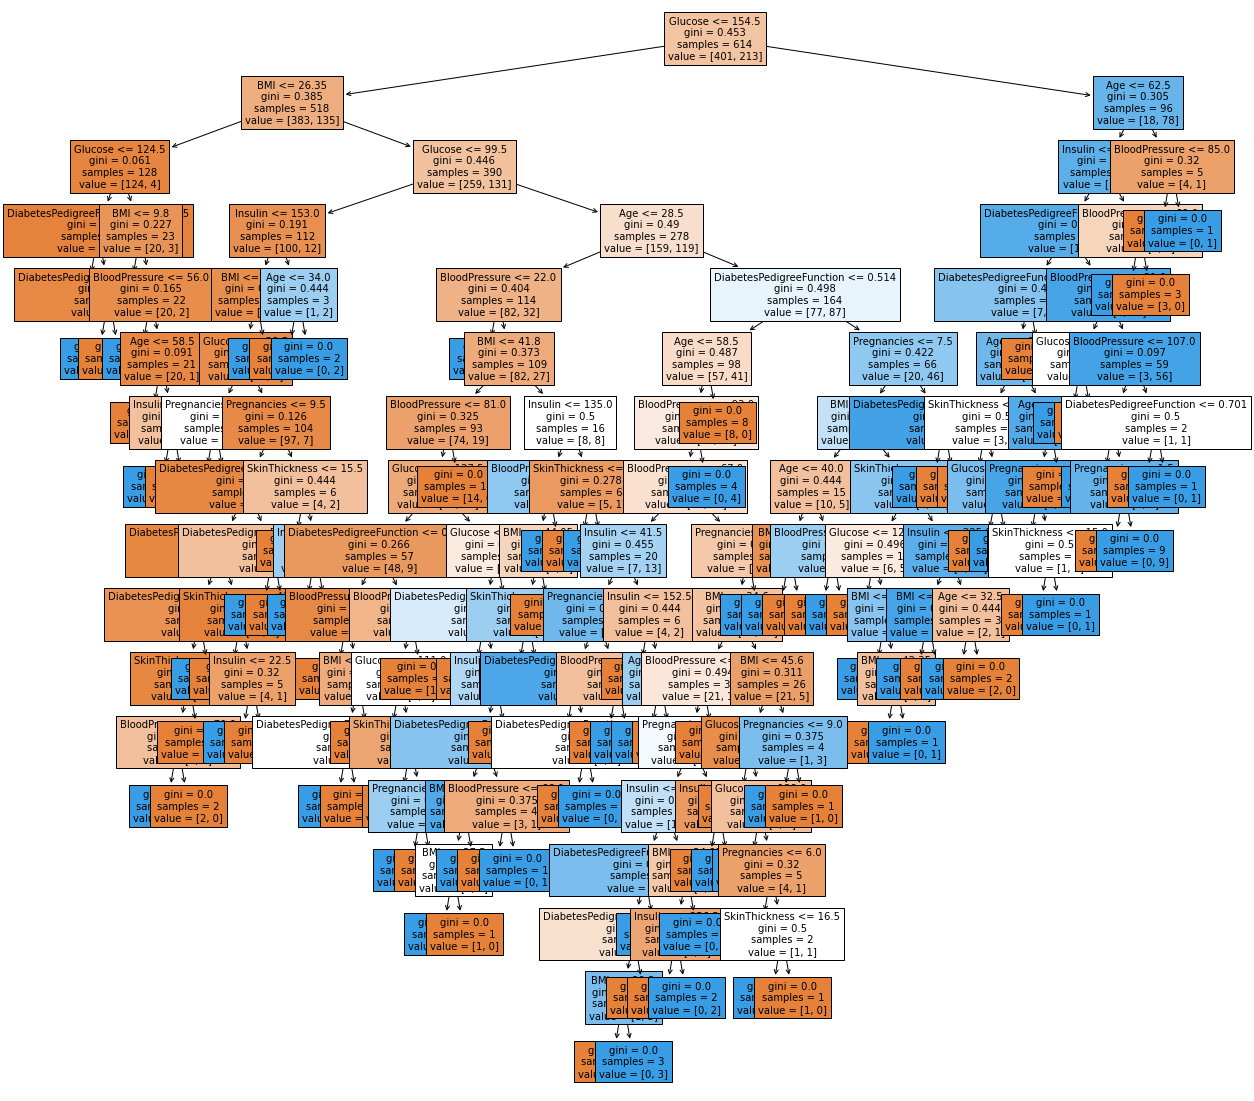

In [15]:
from sklearn.tree import plot_tree

#plot_tree(model,feature_names = feature_names)
#시각화하면
plt.figure(figsize = (20,20))
tree= plot_tree(model, feature_names= feature_names , filled = True,fontsize=10)

In [16]:
model.feature_importances_

array([0.0689067 , 0.30051814, 0.12129179, 0.04594198, 0.08584152,
       0.16245585, 0.12255951, 0.09248451])

<AxesSubplot:>

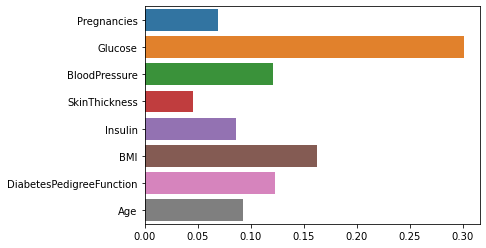

In [17]:
#중요도 수치 시각화
sns.barplot(x=model.feature_importances_, y= feature_names)

### 정확도 예측하기

In [18]:
diff_count = abs(Y_test - y_predict).sum()
diff_count

43

In [19]:
abs(Y_test - y_predict).sum()/len(Y_test) * 100

27.92207792207792

In [20]:
# 사이킷런의 accuracy 메트릭 사용
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_predict)

0.7207792207792207

In [21]:
model.score(X_test,Y_test)*100

72.07792207792207